In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir(r'/content/drive/My Drive/ECE1512/P1')

In [ ]:
import os
import numpy as np
import pandas as pd
import requests
import scipy
import pickle
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import interp1d
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras import regularizers
import keras.backend as K
from keras.models import load_model
from tensorflow.core.util import event_pb2
from tensorflow.python.lib.io import tf_record
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model

In [ ]:
from mnist1d_utils import *

ModuleNotFoundError: ignored

In [ ]:
dataset = make_dataset()

In [ ]:
print("x shape: {}, y shape {}".format(dataset['x'].shape, dataset['y'].shape))
print("x template shape: {}, y template shape: {}".
      format(dataset['templates']['x'].shape, dataset['templates']['y'].shape))

x shape: (4000, 40), y shape (4000,)
x template shape: (10, 12), y template shape: (10,)


In [ ]:
x_test = dataset['x_test']
y_test = dataset['y_test']

In [ ]:
model=load_model('models/MNIST1D.h5')

In [ ]:
index = int(np.floor(np.random.rand()*1000))
input = np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)
label = y_test[index]
print("x_test dim: {}, y_test dim: {}".format(x_test.shape, y_test.shape))
print("index: {}, input dim: {}, ytest dim: {}".
      format(index, input.shape, y_test.shape))
print('Correct digit: '+str(label))
print('Predicted digit: '+str(np.argmax(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy())))
print('Confidence score for the correct label: '+str(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy()[0,label]))

x_test dim: (1000, 40), y_test dim: (1000,)
index: 380, input dim: (1, 40, 1), ytest dim: (1000,)
Correct digit: 3
Predicted digit: 3
Confidence score for the correct label: 1.0


In [ ]:
# Task1.1.a: Overall classification accuracy
prediction = np.argmax(model(np.expand_dims(x_test, axis=-1)), axis=1)
print("Overall accuracy: {:.3f}".format(np.mean(prediction == y_test)))

Overall accuracy: 0.877


Digit class 0 with size 102 score: 0.980
Digit class 1 with size 104 score: 0.808
Digit class 2 with size 89 score: 0.888
Digit class 3 with size 106 score: 0.943
Digit class 4 with size 106 score: 0.849
Digit class 5 with size 98 score: 0.816
Digit class 6 with size 99 score: 0.919
Digit class 7 with size 96 score: 0.865
Digit class 8 with size 98 score: 0.918
Digit class 9 with size 102 score: 0.784


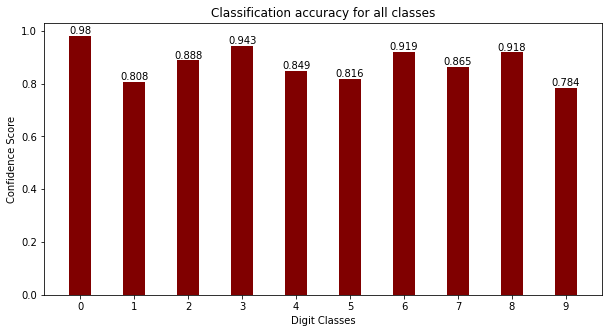

In [ ]:
# Task1.1.b: Classification accuracy for all classes
accuracy_array = []
class_array = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


for digit in range(10):
  digit_index = np.where(y_test == digit)
  digit_size = digit_index[0].size
  x_test_digit = x_test[digit_index]
  pred_digit = np.argmax(model(np.expand_dims(x_test_digit, axis=-1)), axis=1)
  acc_digit =  np.where(pred_digit == digit)[0].size / digit_size
  accuracy_array.append(acc_digit)
  print("Digit class {} with size {} score: {:.3f}".format(digit, digit_size, acc_digit))


fig, ax = plt.subplots(figsize=(10,5))
bar_plot = plt.bar(class_array, accuracy_array, color ='maroon', width = 0.4)
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                str(round(accuracy_array[idx],3)),
                ha='center', va='bottom', rotation=0)
plt.xlabel("Digit Classes") 
plt.ylabel("Confidence Score") 
plt.title("Classification accuracy for all classes")
autolabel(bar_plot)
plt.savefig('part1-task1-1')
plt.show()


In [ ]:
!pip install scikit-plot

(1000,)
(1000,)


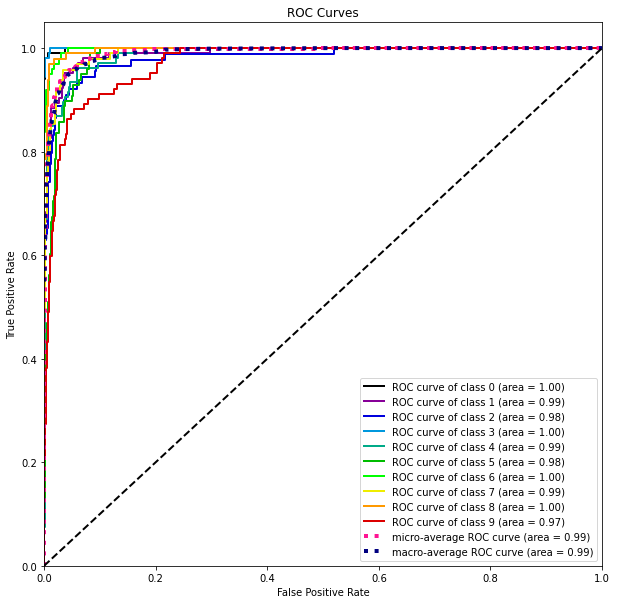

In [ ]:
# Task1.1.c: ROC and AUC for each class
import scikitplot as skplt
y_pred = model(np.expand_dims(x_test, axis=-1))
print(np.argmax(y_pred, axis=-1).shape)
print(y_test.shape)
skplt.metrics.plot_roc(y_test, y_pred, figsize=(10,10))
plt.savefig('part1-task1-2')
plt.show()

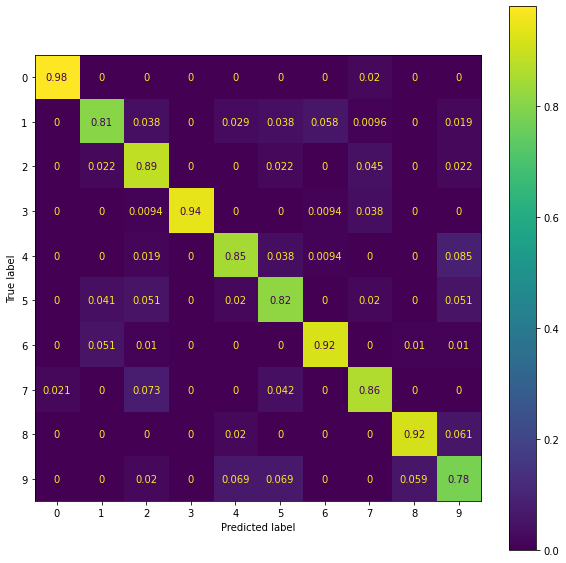

In [ ]:
# Task1.1.d: Normalized confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
class_labels = [0,1,2,3,4,5,6,7,8,9]
cm = confusion_matrix(y_test, y_pred_argmax, labels=class_labels, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
disp.figure_.set_figheight(10)
disp.figure_.set_figwidth(10)


Digit 0 F1 score: 0.9803921568627451
Digit 1 F1 score: 0.8442211055276383
Digit 2 F1 score: 0.831578947368421
Digit 3 F1 score: 0.970873786407767
Digit 4 F1 score: 0.8571428571428571
Digit 5 F1 score: 0.8040201005025126
Digit 6 F1 score: 0.9191919191919192
Digit 7 F1 score: 0.8645833333333333
Digit 8 F1 score: 0.923076923076923
Digit 9 F1 score: 0.7729468599033817


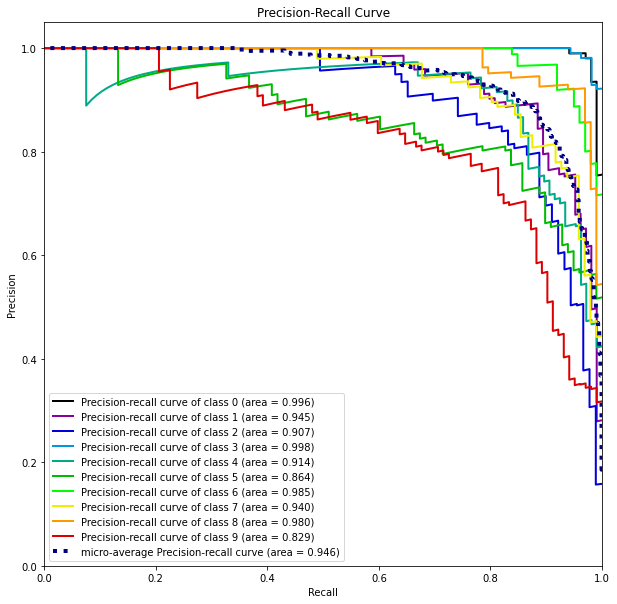

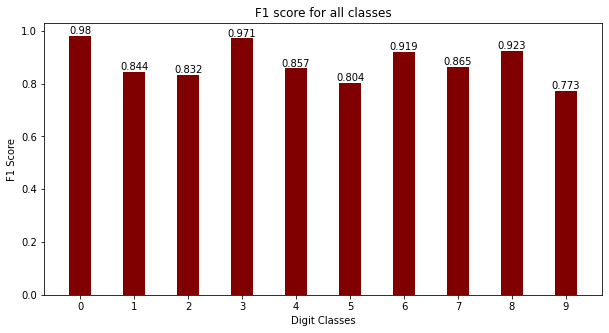

In [ ]:
# Task1.1.e: Precision, Recall, and F1 score
from sklearn.metrics import precision_recall_fscore_support as f1_score
f1_plot = []
_precision, _recall, fscore, _support = f1_score(y_test, np.argmax(y_pred, axis=-1))
for iter in range(fscore.shape[0]):
  f1_plot.append(fscore[iter])
  print("Digit {} F1 score: {}".format(iter, fscore[iter]))

skplt.metrics.plot_precision_recall(y_test, y_pred, figsize=(10,10))
plt.savefig('part1-task1-4')
plt.show()




fig, ax = plt.subplots(figsize=(10,5))
bar_plot = plt.bar(class_array, f1_plot, color ='maroon', width = 0.4)
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                str(round(f1_plot[idx],3)),
                ha='center', va='bottom', rotation=0)
plt.xlabel("Digit Classes") 
plt.ylabel("F1 Score") 
plt.title("F1 score for all classes")
autolabel(bar_plot)
plt.savefig('part1-task1-5')
plt.show()

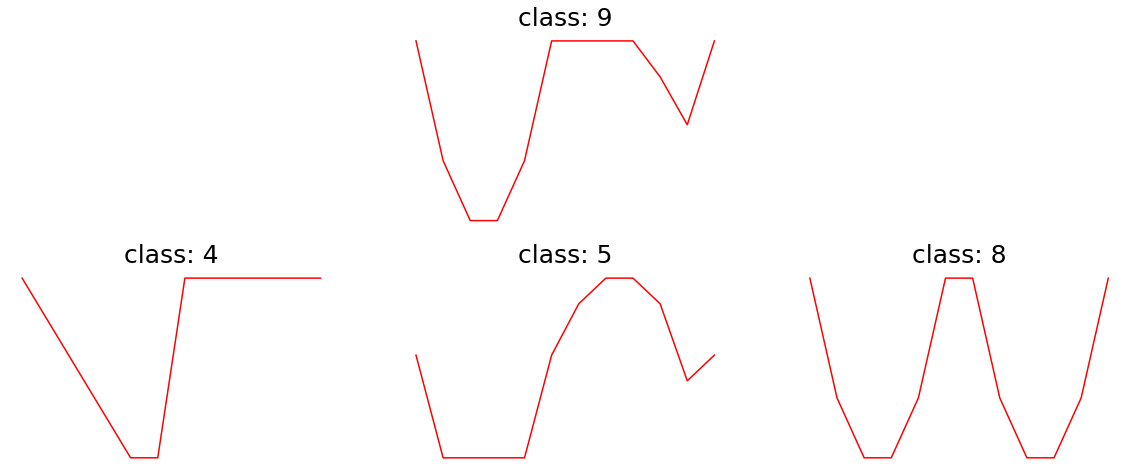

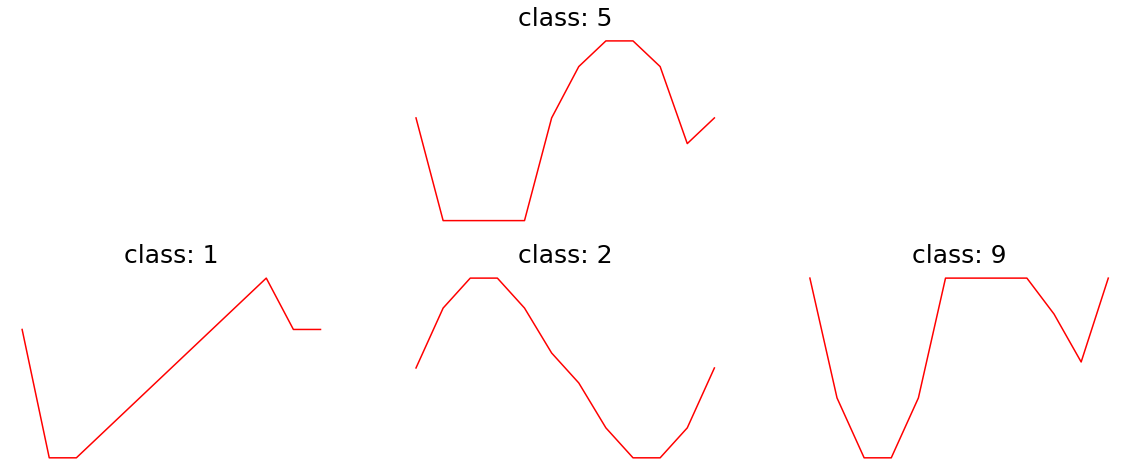

In [ ]:
# Task1.2
# Which two classes misclassify the most?
# class 5 and 9 based on AUC of ROC, AUC of PRC, F1 score, and accuracy.
# print(y_test)
# print("================")
# print(y_pred_argmax)
# index 3: test == 9 predict == 2
# index 22: test == 5 predict == 7

# Analytic reasons?
#@title Show the digit templates in the MNIST 1-D dataset 

plt.figure(figsize=(20,8))
plt.subplot(232)
plt.plot(dataset['templates']['x'][9], 'r')
plt.axis('off')
plt.title('class: 9', fontsize=25)

plt.subplot(234)
plt.plot(dataset['templates']['x'][4], 'r')
plt.axis('off')
plt.title('class: 4', fontsize=25)

plt.subplot(235)
plt.plot(dataset['templates']['x'][5], 'r')
plt.axis('off')
plt.title('class: 5', fontsize=25)

plt.subplot(236)
plt.plot(dataset['templates']['x'][8], 'r')
plt.axis('off')
plt.title('class: 8', fontsize=25)

plt.savefig('part1-task2-1')


plt.figure(figsize=(20,8))
plt.subplot(232)
plt.plot(dataset['templates']['x'][5], 'r')
plt.axis('off')
plt.title('class: 5', fontsize=25)

plt.subplot(234)
plt.plot(dataset['templates']['x'][1], 'r')
plt.axis('off')
plt.title('class: 1', fontsize=25)

plt.subplot(235)
plt.plot(dataset['templates']['x'][2], 'r')
plt.axis('off')
plt.title('class: 2', fontsize=25)

plt.subplot(236)
plt.plot(dataset['templates']['x'][9], 'r')
plt.axis('off')
plt.title('class: 9', fontsize=25)

plt.savefig('part1-task2-2')

In [ ]:
#Task2.1
# Research on the methods (SISE and SHAP)

In [ ]:
# Reference: from MNIST1D.ipynb

index = int(np.floor(np.random.rand()*1000))
print(index)
input = np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)
print(input.shape)
label = y_test[index]
print('Correct digit: '+str(label))
print('Predicted digit: '+str(np.argmax(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy())))
print('Confidence score for the correct label: '+str(model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy()[0,label]))

522
(1, 40, 1)
Correct digit: 6
Predicted digit: 6
Confidence score for the correct label: 0.9999989


exp: (40, 1)
input[0]: (40, 1)
0.06996960021996454


Text(0.5, 1.0, 'Highlighted input region (by the SISE algorithm)')

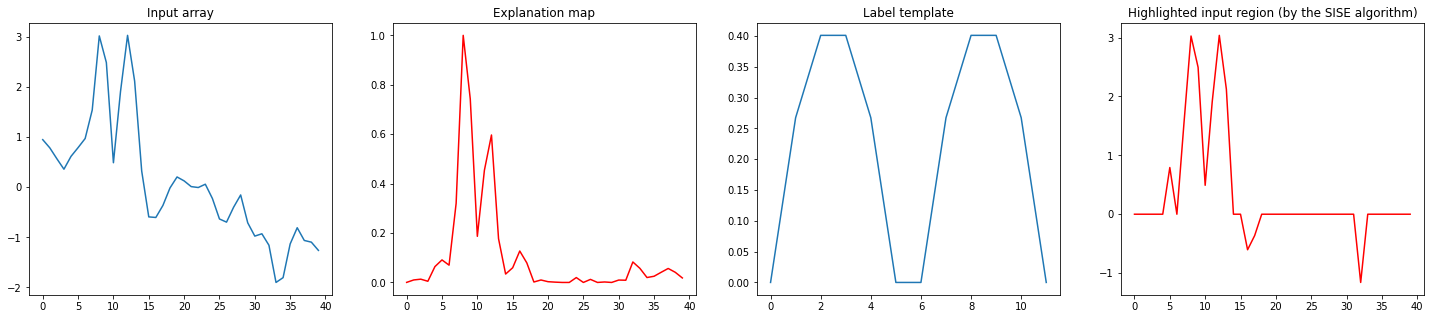

In [ ]:
#Task2.2
from xai_utils import *
explanation = SISE(input, model, label, [['conv1d_2']], grad_thr=0.)

threshold = np.sort(explanation[:,0])[-12]
print("exp: {}".format(explanation.shape))
print("input[0]: {}".format(input[0].shape))
print(threshold)

plt.figure(figsize=(25,5))

plt.subplot(1,4,1)
plt.plot(input[0])
plt.title('Input array')

plt.subplot(1,4,2)
plt.plot(explanation, 'r')
plt.title('Explanation map')

plt.subplot(1,4,3)
plt.plot(dataset['templates']['x'][label])
plt.title('Label template')

plt.subplot(1,4,4)
plt.plot((input[0]*(explanation>threshold)), 'r')
plt.title('Highlighted input region (by the SISE algorithm)')

In [ ]:
#Task2.3: Qualitatively report

In [ ]:
def calculate_drop_increase(images, model, exmap, class_index, frac=0.15):
    predictions = model.predict(images)
    #print(images.shape)
    # Pre-processing image 
    img=images[0,:,:]
    #img=img_to_array(img)
    img = np.expand_dims(img,axis=0)
    # Getting the prediction for image
    Y=predictions[0][class_index]
    
    grad_array=np.reshape(exmap, (-1,))
    array_size=int(grad_array.shape[0]*frac)
    thr=np.flip(sorted(grad_array))[array_size]
    exmap1_msk=(exmap>thr)
    exmap1_thr=np.zeros(shape=(1,40,1))
    exmap1_thr=img*exmap1_msk
    ex_predictions = model.predict(exmap1_thr)[0]
    O1=ex_predictions[class_index]
    etta=(Y-O1)/(Y+1e-100)
    return (etta*(etta>0), 1*(etta<0), Y, O1)



In [ ]:
drop_rate = 0.
increase_rate = 0
for index in range(1000):
    prediction=model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy()
    explanation_map = SISE(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1), model, layers=[['conv1d_2']], class_index=np.argmax(prediction[0]), grad_thr=0.)
    __drop, __increase, __true, __pred = calculate_drop_increase(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1), model, explanation_map, class_index=np.argmax(prediction[0]), frac=0.3)
    drop_rate += __drop
    increase_rate += __increase
drop_rate /= 1000
increase_rate /= 1000
print("drop rate: {}, increase rate: {}".format(drop_rate, increase_rate))

drop rate: 0.1371740567880671, increase rate: 0.375


In [ ]:
explanation_map_shap = np.load('minist_expm_shap.npy')
print("shap explanation map dim on MNIST1-D: {}".format(explanation_map_shap.shape))
drop_rate = 0.
increase_rate = 0
for index in range(1000):
    prediction=model(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1)).numpy()
    explanation_map = np.expand_dims(explanation_map_shap[index], axis=-1)
    __drop, __increase, __true, __pred = calculate_drop_increase(np.expand_dims(np.expand_dims(x_test[index], axis=0), axis=-1), model, explanation_map, class_index=np.argmax(prediction[0]), frac=0.3)
    drop_rate += __drop
    increase_rate += __increase
drop_rate /= 1000
increase_rate /= 1000
print("drop rate: {}, increase rate: {}".format(drop_rate, increase_rate))

shap explanation map dim on MNIST1-D: (1000, 40)
drop rate: 0.45967771640196364, increase rate: 0.2
